# **Winfred Mutinda**

## **Bitcoin price prediction with Long Short-Term Memory(LSTM)**

## **African Institute of Mathematical Sciences(AIMS), South Africa.**

This code uses a non-linear model, LSTM which is a type of recurrent neural network to predict the daily price of bitcoin.

Installing yfinance to enable loading the data from online.

In [ ]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=9f0a799fa06c8554f29317653adfcd4576fe7c135b68c1e4113bea32a0a43fed
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


### **Loading the dataset**

In [ ]:
import yfinance as yf
data= yf.download ("BTC-USD",start="2014-09-17",end="2020-08-05")

[*********************100%***********************]  1 of 1 completed


In [ ]:
## Viewing the dataset 
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2020-07-31,11110.210938,11415.864258,10987.053711,11323.466797,11323.466797,23160469766
2020-08-01,11322.570312,11794.775391,11239.682617,11759.592773,11759.592773,26075670303
2020-08-02,11758.764648,12034.144531,11018.129883,11053.614258,11053.614258,27410067336


In [ ]:
data.shape

(2149, 6)

The data has 2149 observations and 6 columns.

## **Explanatory data analysis**

Checking whether our data has missing.

In [ ]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Getting the summary of our data.

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2.149000e+03
mean,4255.163017,4365.250283,4138.694935,4260.327404,4260.327404,7.575618e+09
std,4055.064258,4177.588583,3914.645418,4057.491383,4057.491383,1.146815e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,429.575012,434.230988,422.842987,429.105011,429.105011,5.909100e+07
50%,3469.091797,3521.388184,3413.481445,3476.114746,3476.114746,1.710130e+09
75%,7677.269043,7884.990234,7502.009766,7679.867188,7679.867188,1.089713e+10
max,19475.800781,20089.000000,18974.099609,19497.400391,19497.400391,7.415677e+10


### The difference between Close and Adjusted Close

In [ ]:
import numpy as np
np.sum(data['Close'] - data['Adj Close'])

0.0

## **Visualizing the Close Price (USD) data**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


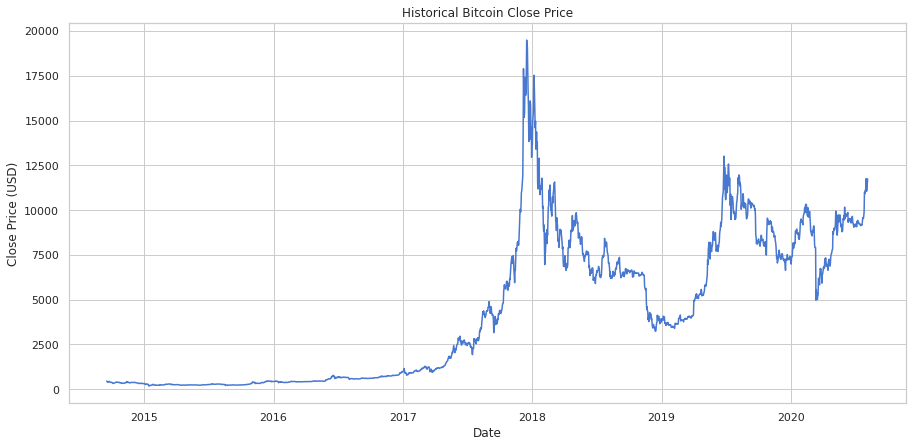

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.0)

plt.figure(figsize=(15,7))
plt.title('Historical Bitcoin Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(data['Close'])
plt.show()



#ax = data.plot(x='Date', y='Closing Price (USD)');
#ax.set_xlabel("Date")
#ax.set_ylabel("Close Price (USD)")

### **Boxplot**

Boxplot is used for checking whether the close price has some outliers.

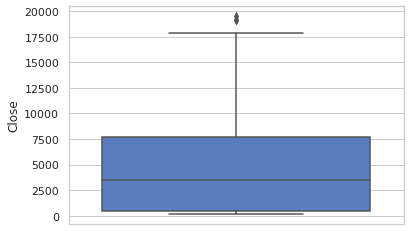

In [ ]:
## import library 
import seaborn as sns

# Make boxplot for Close column
sns.boxplot( y=data["Close"] )


### **Plot of the Correlation Matrix**

### Correlation Table

In [ ]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998813,0.998078,0.997524,0.997524,0.683214
High,0.998813,1.000000,0.997572,0.998922,0.998922,0.683555
Low,0.998078,0.997572,1.000000,0.998677,0.998677,0.685387
Close,0.997524,0.998922,0.998677,1.000000,1.000000,0.684096
Adj Close,0.997524,0.998922,0.998677,1.000000,1.000000,0.684096
Volume,0.683214,0.683555,0.685387,0.684096,0.684096,1.000000


## Seaborn Correlation Heatmap

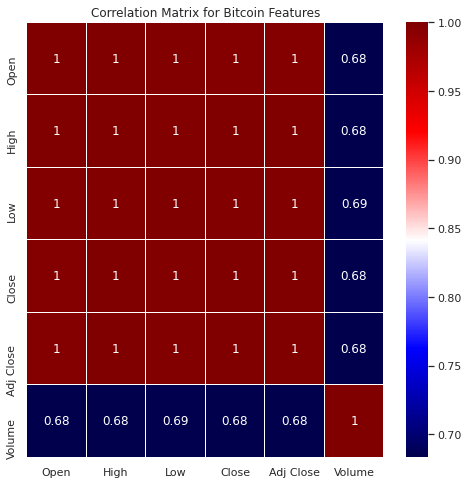

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,8))
corr= data.corr()
sns.heatmap(corr,annot=True,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="seismic")
plt.title("Correlation Matrix for Bitcoin Features")
plt.show()

To check the relationship between our features.

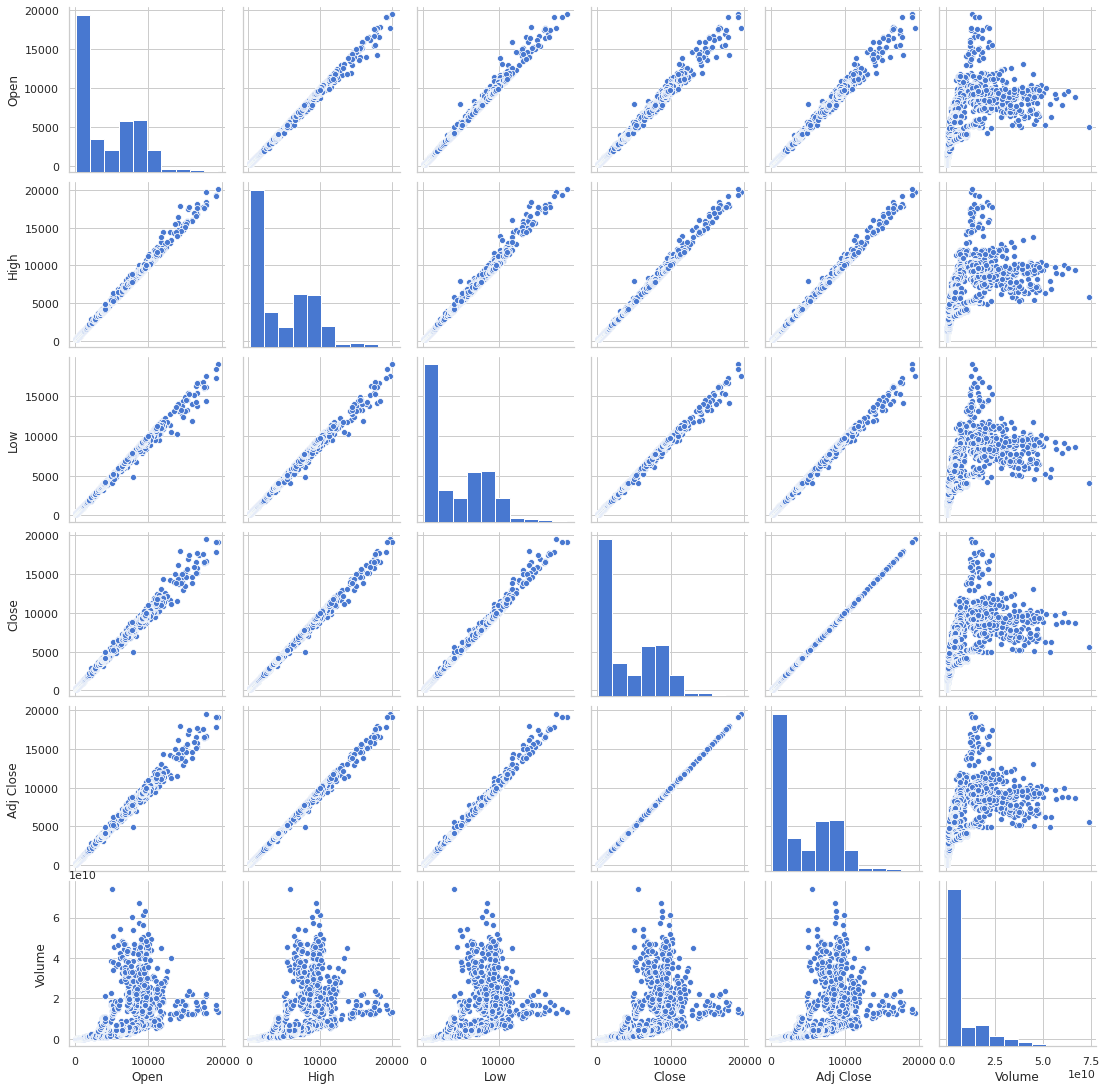

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)


# **Data Preprocessing**

Before doing our preprocessing, we need to create a dataframe for the open and close.

## **Constructing  a pandas dataframe with columns labelled Open and Close, indexed by dates.**

In [ ]:
import pandas as pd ## Importing the pandas library

Op=data["Open"]
Cl=data["Close"]

data1=pd.DataFrame(Op.values,columns=["Open"])
data1["Close"]=Cl.values

data1.index=Cl.index

data1.head(10)

,Open,Close
Date,,
2014-09-17,465.864014,457.334015
2014-09-18,456.859985,424.440002
2014-09-19,424.102997,394.795990
2014-09-20,394.673004,408.903992
2014-09-21,408.084991,398.821014
2014-09-22,399.100006,402.152008
2014-09-23,402.092010,435.790985
2014-09-24,435.751007,423.204987
2014-09-25,423.156006,411.574005


Checking the shape of the data

In [ ]:
data1.shape

(2149, 2)

## **Normalization**

Using ScikitLearn’s MinMaxScaler function to normalise the data to be between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_arr = scaler.fit_transform(data1[:])

## Viewing the scaled data
scaled_data=pd.DataFrame(scaled_arr)
scaled_data.head(10)



,0,1
0,0.014973,0.014453
1,0.014507,0.012751
2,0.012809,0.011216
3,0.011284,0.011947
4,0.011979,0.011425
5,0.011514,0.011597
6,0.011669,0.013338
7,0.013413,0.012687
8,0.012760,0.012085
9,0.012153,0.011715


In [ ]:
scaled_data.shape

(2149, 2)

In [ ]:
Scaled_Open=scaled_data[0].values
Scaled_Close=scaled_data[1].values

In [ ]:
Scaled_Open


array([0.01497323, 0.01450668, 0.01280933, ..., 0.60013086, 0.56308232,
       0.57137578])

In [ ]:
Scaled_Close


array([0.01445348, 0.01275083, 0.0112164 , ..., 0.56293513, 0.5729114 ,
       0.59882713])

## **Splitting the dataset into training set and testing set**

In [ ]:
## we will use 80% for training
train_size = int(len(Scaled_Close) * 0.8) 

## We will use 20% for testing
test_size = len(Scaled_Close) - train_size 

# Split the data manually 
trainO, testO = Scaled_Open[0:train_size], Scaled_Open[train_size:len(Scaled_Open)]
trainC, testC = Scaled_Close[0:train_size], Scaled_Close[train_size:len(Scaled_Close)]

In [ ]:
trainC.shape

(1719,)

In [ ]:
testC.shape

(430,)

In [ ]:
trainO.shape

(1719,)

In [ ]:
testO.shape

(430,)

## **Create the labels for the dataset**

We create the labels for our dataset using 10 days look back.

In [ ]:
import numpy as np

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 10

# Split the data into training features and training targets
trainX, trainY = create_dataset(trainC, look_back)

# Split the data into testing features and testing targets
testX, testY = create_dataset(testC, look_back)

### Checking the shape of the data.

In [ ]:
print('Train X shape ',trainX.shape)
print('Train Y shape',trainY.shape)
print('Test X shape ',testX.shape)
print('Test Y shape ',testY.shape)

Train X shape  (1708, 10)
Train Y shape (1708,)
Test X shape  (419, 10)
Test Y shape  (419,)


## **Reshaping the data for LSTM model**

We must convert the data to 3 dimensional such that the input shape has:

#### **Samples:** Which represents the sample size, we have 2149 observations

#### **Time steps:** One time step is one point of look back in the sample, here we have a lookback of 10 days.

#### **Feature:** This is the variable observed to give direction fo our prediction at a time step. 

In [ ]:
trainXkeras = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testXkeras = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


In [ ]:
print('Train X shape ',trainXkeras.shape)
print('Train Y shape',trainY.shape)
print('Test X shape ',testXkeras.shape)
print('Test Y shape ',testY.shape)


Train X shape  (1708, 10, 1)
Train Y shape (1708,)
Test X shape  (419, 10, 1)
Test Y shape  (419,)


## **Creating our LSTM model**

In [ ]:
## Import the required libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation, Dropout

## Defining our model
model = Sequential()

# Adding an LSTM cell.
model.add(LSTM(10, batch_input_shape=(None,10,1), stateful=False))

# We have to add a fully connected layer of the LSTM to output the predictions. Here we only have 1 node because our time-series prediction is expecting one output. 
model.add(Dense(1))

# We define our loss function. Here since we are dealing with numerical data, one option is to use mean squared error and we will use adam as the optimization function.
model.compile(loss='mean_squared_error', optimizer='adam')

Checking summary of the model

In [ ]:
# Check the number of parameters. 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


### **Training the model**

In [ ]:
import time
start = time.time()
result= model.fit(trainXkeras, trainY, epochs=100, batch_size=20,validation_split=0.2, verbose = 0, shuffle=False)
print("> Compilation Time : ", time.time() - start)

> Compilation Time :  31.12341547012329


## **Plot of the training loss verses the validation loss**

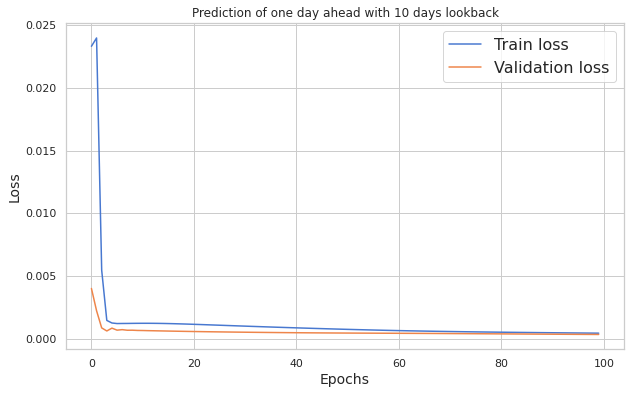

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(result.epoch,result.history['loss'],label="Train loss")
plt.plot(result.epoch,result.history['val_loss'],label="Validation loss")
plt.legend(fontsize=16)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Loss",fontsize=14)
plt.title('Prediction of one day ahead with 10 days lookback')
plt.show()

## **Predicting on the test data and preparing the data for plotting**

In [ ]:
import math

# Estimate model performance
batch_size=10
trainScore = model.evaluate(trainXkeras, trainY, batch_size=batch_size, verbose=0)
model.reset_states()

# generate predictions for training
trainPredict = model.predict(trainXkeras, batch_size=batch_size)
testPredict = model.predict(testXkeras, batch_size=batch_size)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(Scaled_Open)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict.reshape(1,-1)

# shift test predictions for plotting
testPredictPlot = np.empty_like(Scaled_Open)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(Scaled_Close)-1] = testPredict.reshape(1,-1)

openforcomparison = np.empty_like(Scaled_Open)
openforcomparison[:] = np.nan
openforcomparison[len(trainO):len(Scaled_Open)] = testO


In [ ]:
openforcomparison

array([       nan,        nan,        nan, ..., 0.60013086, 0.56308232,
       0.57137578])


## Comparing the predicted values of the next day's closing Bitcoin price on both training and testing data against the actual closing Bitcoin prices

No handles with labels found to put in legend.


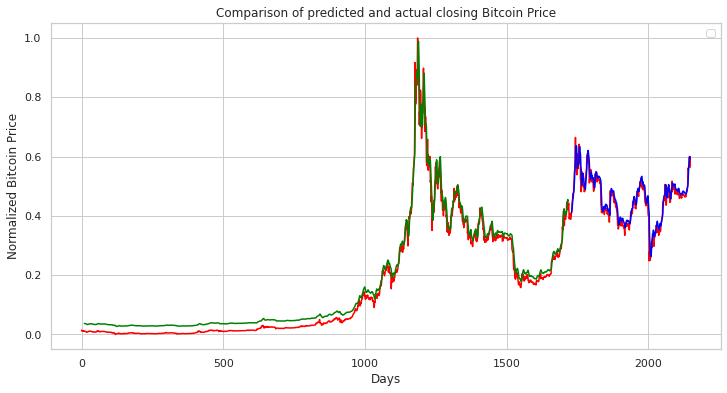

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(Scaled_Close,"red")
plt.plot(trainPredictPlot,"green")
plt.plot(testPredictPlot,"blue")
plt.title("Comparison of predicted and actual closing Bitcoin Price")
plt.xlabel("Days")
plt.ylabel("Normalized Bitcoin Price")
plt.legend()
plt.show()



## Comparing today's opening Bitcoin price against the predicted closing Bitcoin prices

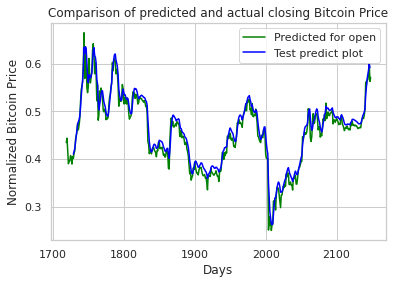

In [ ]:
openforcomparison = np.empty_like(Scaled_Open)
openforcomparison[:] = np.nan
openforcomparison[len(trainO):len(Scaled_Open)] = testO

plt.plot(openforcomparison,"green", label="Predicted for open")
plt.plot(testPredictPlot,"blue",label="Test predict plot")
plt.title("Comparison of predicted and actual closing Bitcoin Price")
plt.xlabel("Days")
plt.ylabel("Normalized Bitcoin Price")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
Error1= mean_squared_error(testY,testPredict)
RMSE = np.sqrt(Error1)
Error2 = mean_absolute_error(testY,testPredict)
Error3 = mean_absolute_percentage_error(testY,testPredict)

print('The Mean Squared Error is: ', Error1)
print
print('The Root Mean Squared Error is: ', RMSE)
print
print('The Mean Absolute Error is: ', Error2)
print 
print('The Mean Absolute Percentage Error is: ', Error3)



The Mean Squared Error is:  0.0005591871909880971
The Root Mean Squared Error is:  0.023647139171326773
The Mean Absolute Error is:  0.017219189713993985
The Mean Absolute Percentage Error is:  19.296188369658882
